# import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from random import sample
import math

# Get Dataset

In [2]:
dataset = pd.read_csv("/content/parkinsons_dataset.csv")

dataset.sample(5)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
920,7,72,0,91.302,17.9450,24.963,0.00711,0.000078,0.00208,0.00296,...,0.244,0.01229,0.01457,0.02337,0.03688,0.029003,20.226,0.60173,0.57530,0.19895
924,7,72,0,119.300,16.4160,23.099,0.00536,0.000049,0.00214,0.00292,...,0.298,0.01681,0.02000,0.02854,0.05043,0.035802,21.462,0.57086,0.56998,0.23169
4168,31,75,0,34.356,28.7530,31.103,0.01165,0.000094,0.00520,0.00660,...,0.519,0.02579,0.03377,0.06742,0.07736,0.025986,16.204,0.52694,0.81415,0.41763
2513,18,65,0,102.420,5.9369,7.000,0.00354,0.000022,0.00145,0.00164,...,0.130,0.00678,0.00800,0.01101,0.02033,0.005503,26.043,0.35299,0.67178,0.13399
5531,40,85,1,148.660,16.0990,24.198,0.00597,0.000041,0.00287,0.00331,...,0.346,0.01835,0.01871,0.02344,0.05506,0.054084,20.074,0.63510,0.59153,0.26472


# Split Dataset

In [3]:
seed = 42
df = dataset.sample(frac=1, random_state=seed)  # Shuffle the rows
train_size = int(0.8 * len(df))

train_set = df[:train_size]
test_set = df[train_size:]

# Implement Regularization Linear Regression

In [4]:
class Reg_Linear_Regression:

  def MSE(self):
    try:
      f = self.W.shape[1]
    except:
      f = 1

    if(f == 1):
      return np.sum( ((((self.W*test_x) + self.b) - self.test_y )**2)/(np.mean(self.test_y.shape[0])) )

    else:
      print("MSE for all", len(self.W[0]) ,"features")
      return np.sum( ((((  np.dot(self.test_x , self.W[0] )) + self.b) - self.test_y )**2)/(np.mean(self.test_y.shape[0])) )

  # Model ~~ (trian_x, train_y, test_x, test_y, learning_rate, Epoch)
  def __init__(self, training_x, training_y, test_x, test_y, learning_rate, epoch, lambda_val):
    self.training_x = training_x
    self.training_y = training_y
    self.test_x = test_x
    self.test_y = test_y
    self.learning_rate = np.float128(learning_rate)
    self.epoch = epoch
    self.costlog = []
    self.lambda_val = lambda_val

    try:
        n = training_x.shape[1]
    except IndexError:
      n=1
    except:
      print("Considering n = 1")

    m = training_x.shape[0]
    print('Rows: ', n, 'Cols', m)

    b = 0

    # Generate Random Weights
    if n == 1:
      W = np.array([10])
    else:
      W = np.random.randn(1, n)


    for each in range(0,self.epoch):
      # Fwd_prop: find y_hat
      Y_hat = np.float128(np.dot(self.training_x, W[0]) + b)


      ridge_reg = self.lambda_val*np.sum(W[0])**2

      # Find cost: calculate error bwt predicted and actual, consider keeping
      #            log for plotting loss
      j = (np.sum(((Y_hat - np.array(self.training_y, dtype=np.float128))**2.0)) / ( 2.0*m)) + ridge_reg

      self.costlog.append([each, j])
      # Back_prop: Find the derivatives of change in Weights and Bias
      d_Y_hat = (1.0/n) * ((Y_hat - np.array(self.training_y, dtype=np.float128)) + ridge_reg)
      d_W = np.dot(d_Y_hat, self.training_x)
      d_b = np.sum(d_Y_hat, dtype=np.float128)

      # Update: Update weights and biases
      W = W - (learning_rate * d_W)
      b = b - (learning_rate * d_b)
      self.W = W
      self.b = b

In [5]:
def plot_Linear_Regression(LR_Object: Reg_Linear_Regression, n=None):
  if(n == None):
    try:
      total_plot = LR_Object.W[0].shape[0]

    except:
      total_plot = 1

  else:
    total_plot = n

  print(total_plot)

  if(total_plot == 1):
    plt.scatter(LR_Object.test_x , LR_Object.test_y)
    plt.plot(LR_Object.test_x, LR_Object.test_x*LR_Object.W + LR_Object.b, "red")

  elif(total_plot == 2):
    print(LR_Object)
    plt.subplots_adjust(hspace=5, wspace=1)
    fig, axes = plt.subplots(int(total_plot/2), 2, figsize=(9, 5))

    for i, feature in enumerate(LR_Object.test_x.columns):
      sns.scatterplot(x=LR_Object.test_x[feature],
                      y=LR_Object.test_y,
                      ax=axes[i%2])

      sns.scatterplot(x=LR_Object.test_x[feature],
                      y= LR_Object.test_x[feature] * LR_Object.W[0][i] + LR_Object.b,
                      ax=axes[i%2])

  else:
    plt.subplots_adjust(hspace=20, wspace=5)
    fig, axes = plt.subplots(math.ceil(total_plot/2), 2, figsize=(9, 20))

    for i, feature in enumerate(LR_Object.test_x.columns):
      sns.scatterplot(x=LR_Object.test_x[feature],
                      y=LR_Object.test_y,
                      ax=axes[i//2, i%2])

      sns.scatterplot(x=LR_Object.test_x[feature],
                      y=LR_Object.test_x[feature] * LR_Object.W[0][i] + LR_Object.b,
                      ax=axes[i//2, i%2])


In [6]:
train_set_Q3_x = train_set[["PPE", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "DFA"]]
train_set_Q3_y = train_set["motor_UPDRS"]

test_set_Q3_x = test_set[["PPE", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "DFA"]]
test_set_Q3_y = test_set["motor_UPDRS"]

# Implement Regularized Linear Regression Model on the feature sets found in Q3

Rows:  5 Cols 4700
5


<Figure size 640x480 with 0 Axes>

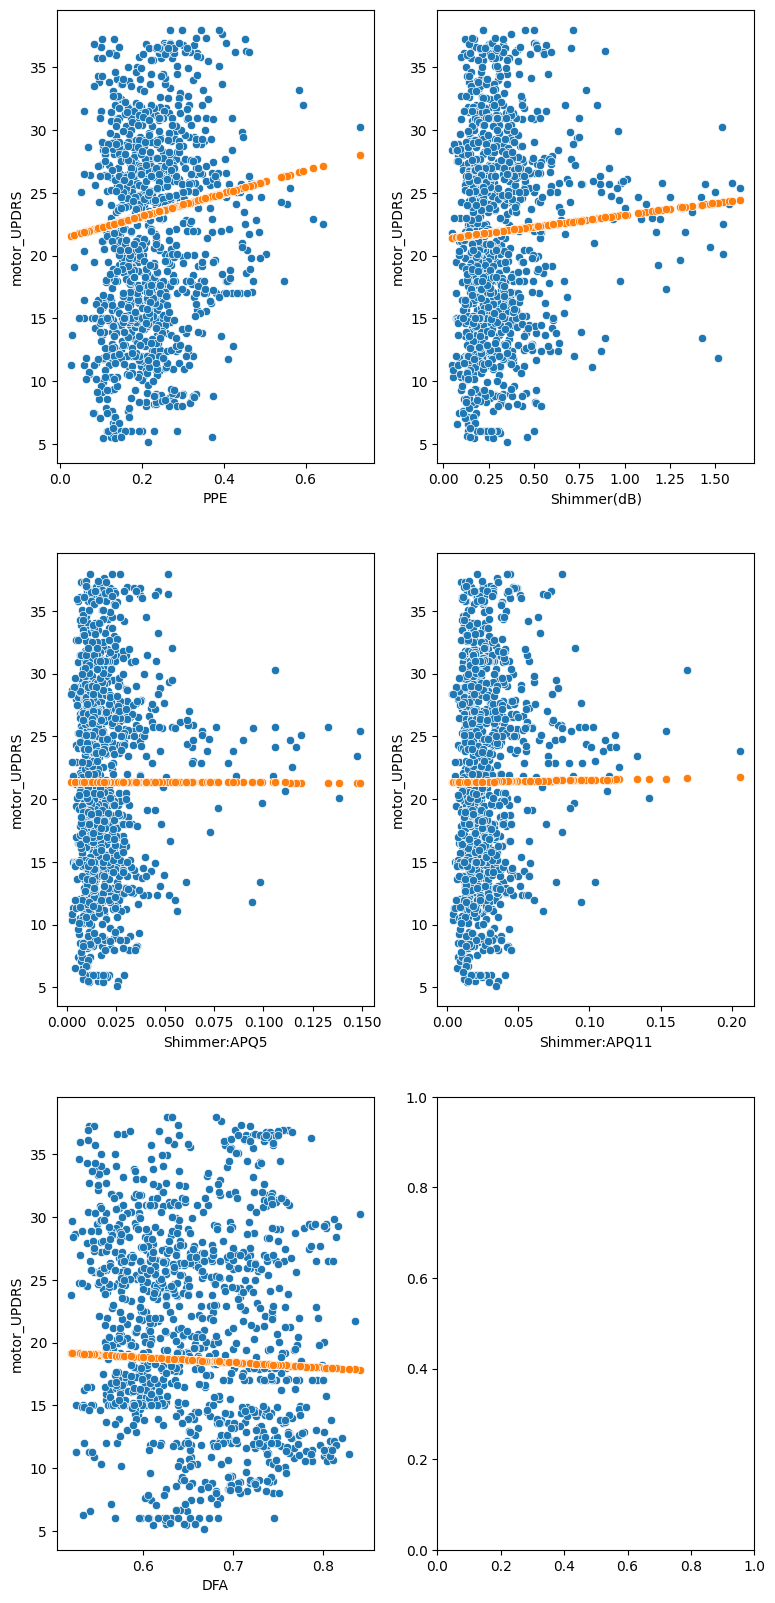

In [7]:
model_Q3var = Reg_Linear_Regression(train_set_Q3_x, train_set_Q3_y, test_set_Q3_x, test_set_Q3_y,  0.0001, 2000, 0)
plot_Linear_Regression(model_Q3var)

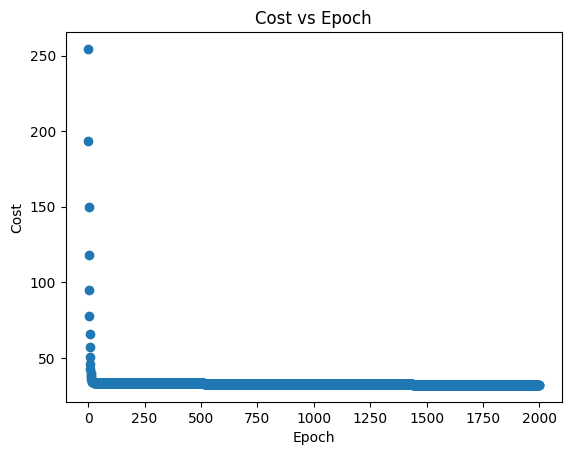

MSE for all 5 features
61.754683376792743558


In [8]:
cost_log = model_Q3var.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.scatter(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()
print(model_Q3var.MSE())

# Regularized Linaer Regression with different values of lambda

In [9]:
regular_MES = [[],[]]
A = [0.1, 0.01, 0.001,0.0001,0.00001,0.000001,0.0000001, 0.00000001, 0.000000001, 0.0000000001, 0.00000000001]
for each in A:
  model_Q3var = Reg_Linear_Regression(train_set_Q3_x, train_set_Q3_y, test_set_Q3_x, test_set_Q3_y,  0.0001, 2000, each)
  regular_MES[0].append(each)
  regular_MES[1].append(model_Q3var.MSE())

Rows:  5 Cols 4700
MSE for all 5 features
Rows:  5 Cols 4700
MSE for all 5 features
Rows:  5 Cols 4700
MSE for all 5 features
Rows:  5 Cols 4700
MSE for all 5 features
Rows:  5 Cols 4700
MSE for all 5 features
Rows:  5 Cols 4700
MSE for all 5 features
Rows:  5 Cols 4700
MSE for all 5 features
Rows:  5 Cols 4700
MSE for all 5 features
Rows:  5 Cols 4700
MSE for all 5 features
Rows:  5 Cols 4700
MSE for all 5 features
Rows:  5 Cols 4700
MSE for all 5 features


In [10]:
sorted(regular_MES)

[[0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09, 1e-10, 1e-11],
 [84.69032331863582514,
  62.34317485515325913,
  61.806734318218094756,
  61.851058651980962345,
  61.810861550846167962,
  61.732329319524668336,
  61.698002667821416484,
  61.75336097388463434,
  61.853380341613539668,
  61.664167801778989875,
  61.777997718367782955]]

Observation - It seems that the model doesnt get better with regularization.
Smaller the lambda value, more accurate the model is.

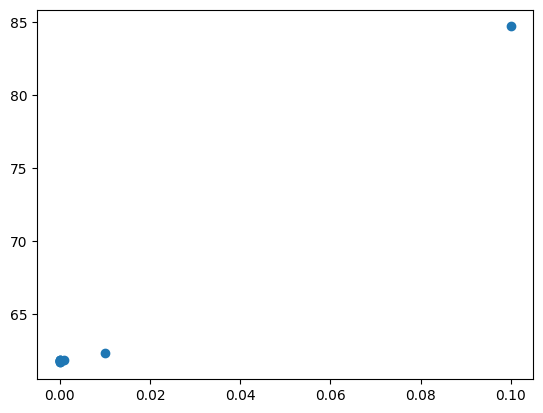

In [11]:
plt.scatter(regular_MES[0], regular_MES[1])

# With all 10 features to see if it solves the Linearity issue with Age feature with lambda 10 ~ 0.0001 (It didnt solve)



Rows:  10 Cols 4700
10


<Figure size 640x480 with 0 Axes>

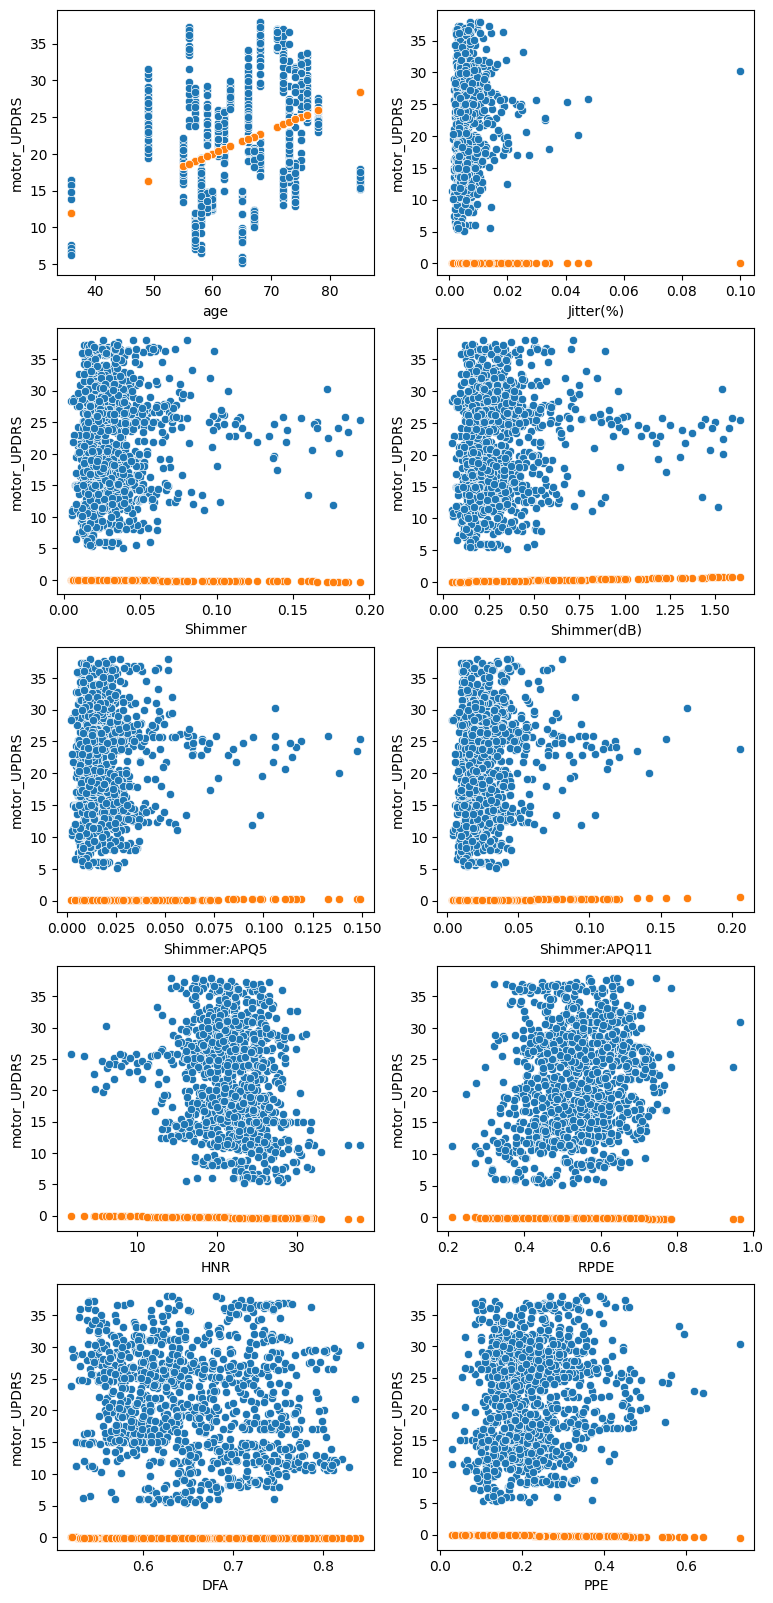

In [19]:
train_fw_sw10 = train_set[["age", "Jitter(%)", "Shimmer", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "HNR", "RPDE", "DFA", "PPE"]]
test_fw_sw10 = test_set[["age", "Jitter(%)", "Shimmer", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "HNR", "RPDE", "DFA", "PPE"]]

model_10var = Reg_Linear_Regression(train_fw_sw10, train_set_Q3_y, test_fw_sw10, test_set_Q3_y, 0.0000001, 2000, .01)
plot_Linear_Regression(model_10var)

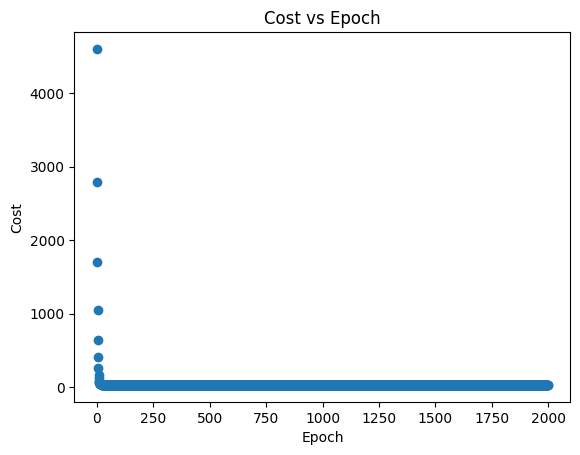

MSE for all 10 features
60.93221123749732593


In [20]:
cost_log = model_10var.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.scatter(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()
print(model_10var.MSE())

# Now trying Regularization with all features

In [14]:
A = np.linspace(0.0000001,1,10)
list_Lamb_MSE = [[],[]]

for each in A:
  train_fw_sw10 = train_set[["age", "Jitter(%)", "Shimmer", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "HNR", "RPDE", "DFA", "PPE"]]
  test_fw_sw10 = test_set[["age", "Jitter(%)", "Shimmer", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "HNR", "RPDE", "DFA", "PPE"]]

  model_10var = Reg_Linear_Regression(train_fw_sw10, train_set_Q3_y, test_fw_sw10, test_set_Q3_y, 0.0000001, 2000, each)
  list_Lamb_MSE[0].append(each)
  list_Lamb_MSE[1].append(model_10var.MSE())

Rows:  10 Cols 4700
MSE for all 10 features
Rows:  10 Cols 4700
MSE for all 10 features
Rows:  10 Cols 4700
MSE for all 10 features
Rows:  10 Cols 4700
MSE for all 10 features
Rows:  10 Cols 4700
MSE for all 10 features
Rows:  10 Cols 4700
MSE for all 10 features
Rows:  10 Cols 4700
MSE for all 10 features
Rows:  10 Cols 4700
MSE for all 10 features
Rows:  10 Cols 4700
MSE for all 10 features
Rows:  10 Cols 4700
MSE for all 10 features


Rows:  10 Cols 4700
10


<Figure size 640x480 with 0 Axes>

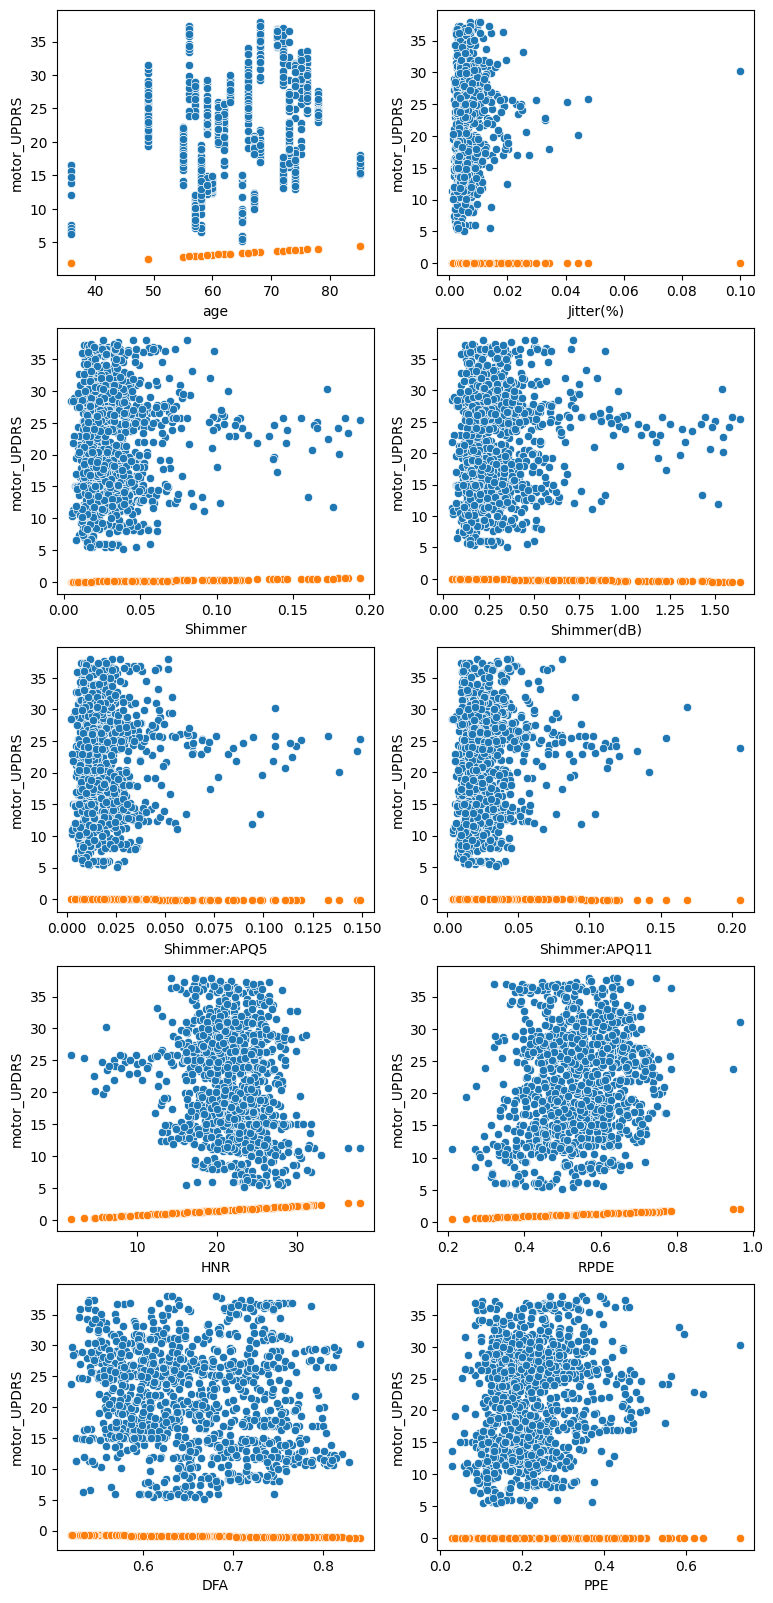

In [15]:
model_10var = Reg_Linear_Regression(train_fw_sw10, train_set_Q3_y, test_fw_sw10, test_set_Q3_y, 0.0000001, 1000, 5)
plot_Linear_Regression(model_10var)

In [21]:
list_Lamb_MSE

[[1e-07,
  0.11111120000000001,
  0.2222223,
  0.3333334,
  0.4444445,
  0.5555555999999999,
  0.6666667,
  0.7777778,
  0.8888889,
  1.0],
 [60.760891577035332726,
  61.62751332959406059,
  63.812653422384340428,
  157.27077843357847403,
  67.550899907721248805,
  75.75642747464800505,
  754.6508614703419684,
  83.97470546245770606,
  251.42305632224699932,
  157.54809388395651969]]

# Regularized Linear Regression on best model from Q3

Rows:  5 Cols 4700
5


<Figure size 640x480 with 0 Axes>

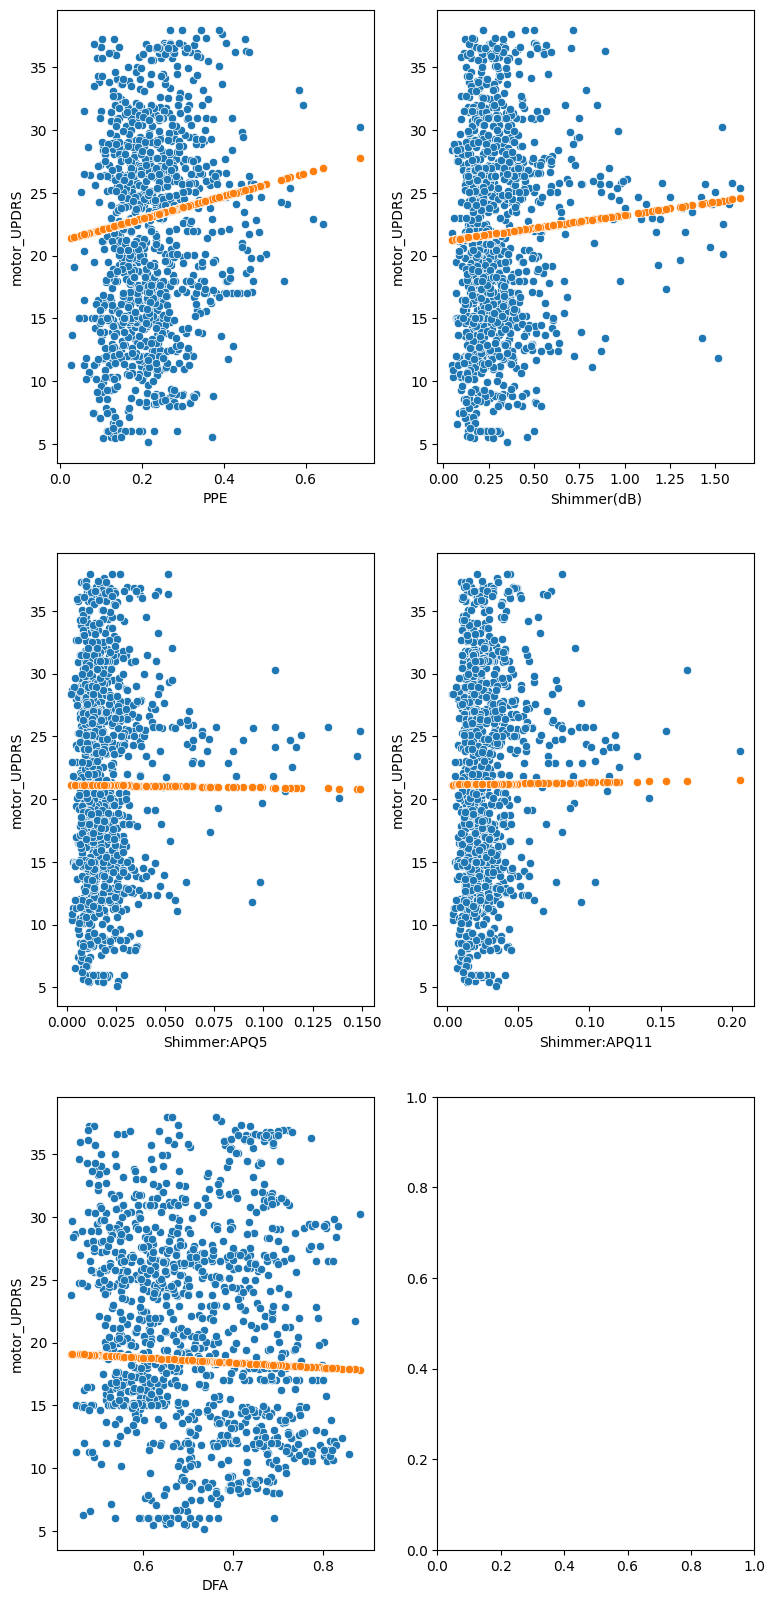

In [68]:
model_Q3var = Reg_Linear_Regression(train_set_Q3_x, train_set_Q3_y, test_set_Q3_x, test_set_Q3_y,  0.0001, 2000, 0.001)
plot_Linear_Regression(model_Q3var)

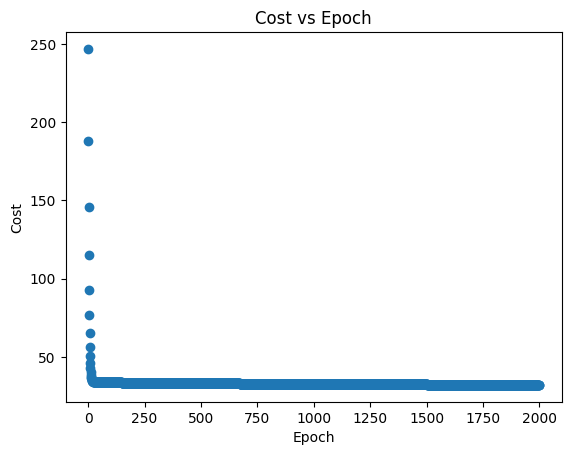

MSE for all 5 features
61.799431694659729342


In [69]:
cost_log = model_Q3var.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.scatter(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()
print(model_Q3var.MSE())